# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [151]:
import pandas as pd
import importlib
# importlib.reload(myutils)
import seaborn as sns
import matplotlib.pyplot as plt


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [152]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


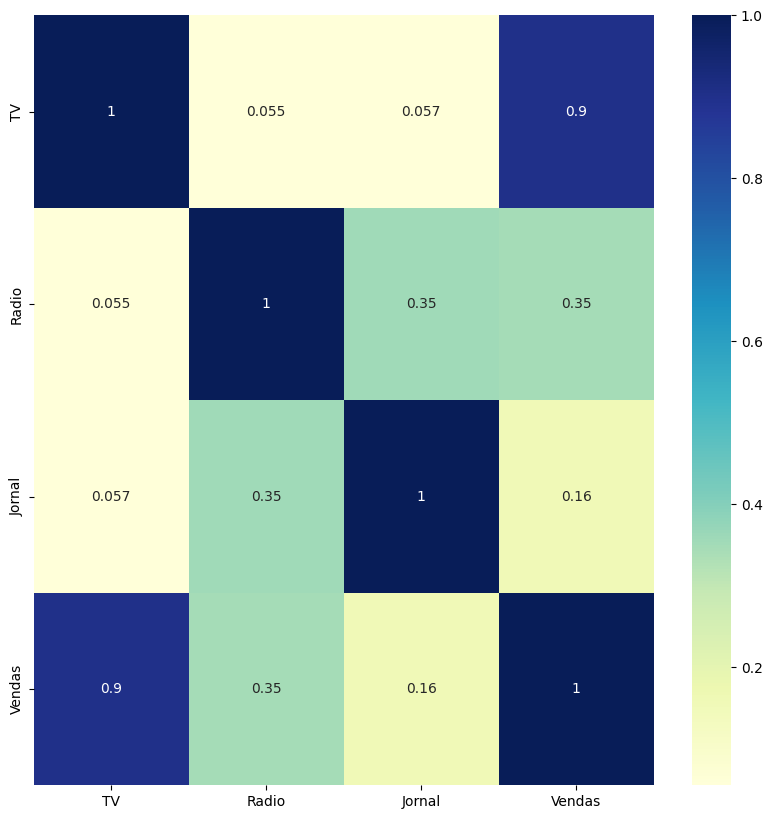

In [153]:
# criar

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)
# exibir
plt.show()

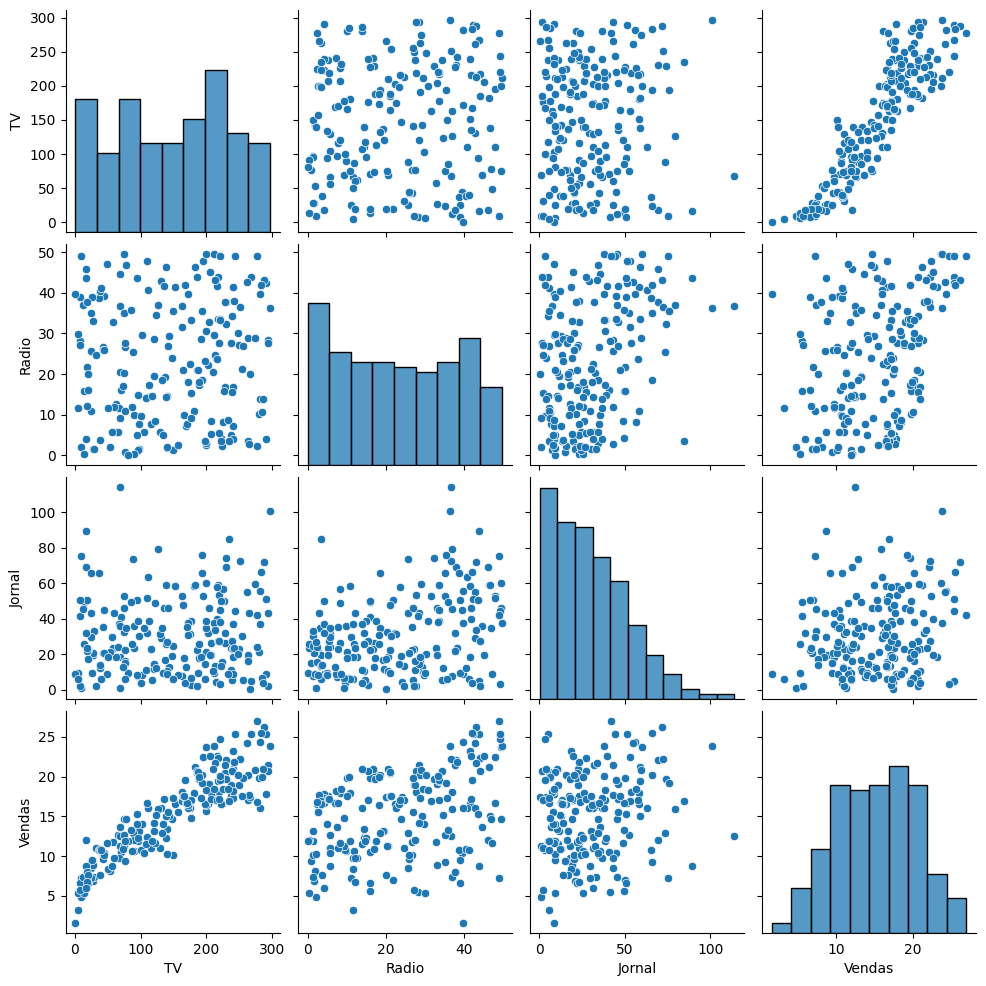

In [154]:
sns.pairplot(df)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [155]:
X = df[['TV', 'Radio', 'Jornal']]
y = df['Vendas']


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
y_test

58     23.8
40     16.6
34     11.9
102    19.8
184    17.6
198    25.5
95     16.9
4      17.9
29     10.5
168    17.1
171    17.5
18     11.3
11     17.4
89     16.7
110    18.4
118    15.9
159    12.9
35     17.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    19.9
38     10.1
28     18.9
193    19.6
27     20.9
47     23.2
165    16.9
194    17.3
177    16.7
176    20.2
97     20.5
174    16.5
73     11.0
69     22.3
172     7.6
108     5.3
107    12.0
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    17.6
181    17.2
106     7.2
199    18.4
138     9.6
Name: Vendas, dtype: float64

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [157]:
# importa ela
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria ela
lr = LinearRegression()
rf = RandomForestRegressor()

# treina ela
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# prediz ela
lr_predictions = lr.predict(X_test)
rf_predictions = rf.predict(X_test)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [158]:
print(r2_score(y_test, lr_predictions))
print(r2_score(y_test, rf_predictions))

0.9071151423684273
0.9627871138874484


#### Visualização Gráfica das Previsões

Comparação do y_true com o y_pred de LinearRegression e RandomForest


,Real,Previsão LR,Previsão RF
58,23.8,21.288161,23.220
40,16.6,18.042132,18.211
34,11.9,10.059590,12.632
102,19.8,21.082241,17.466
184,17.6,20.764760,20.235
198,25.5,24.471874,24.990
95,16.9,16.806436,16.859
4,17.9,15.628857,16.523
29,10.5,10.124799,10.929
168,17.1,18.846019,18.403


,LR,RF
R²,0.907115,0.962787


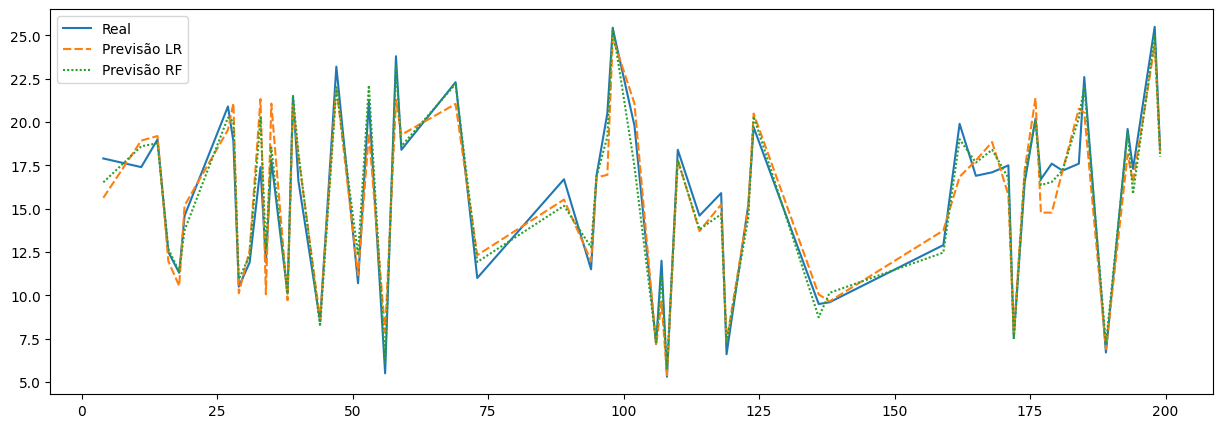

Importância de cada variável para predição


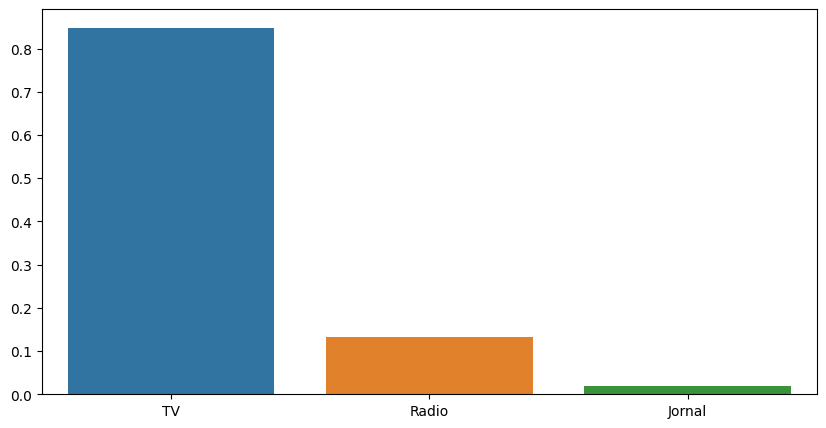

In [169]:

print("Comparação do y_true com o y_pred de LinearRegression e RandomForest")
comparison = pd.DataFrame({'Real': y_test, 'Previsão LR': lr_predictions, 'Previsão RF': rf_predictions})
display(comparison)

metrics = pd.DataFrame({'LR': r2_score(y_test, lr_predictions), 'RF': r2_score(y_test, rf_predictions)}, index=['R²'])
display(metrics)

plt.figure(figsize=(15,5))
sns.lineplot(data=comparison)
plt.show()

# importancia de cada variavel para predição
print("Importância de cada variável para predição")
plt.figure(figsize=(10,5))
sns.barplot(x=X_train.columns, y=rf.feature_importances_)
plt.show()




In [160]:
df_nova = pd.read_csv('novos.csv')
display(df_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [161]:
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Como fazer uma nova previsão?

In [162]:
lr_predictions_new = lr.predict(df_nova)
rf_predictions_new = rf.predict(df_nova)

In [163]:
rf_predictions

array([23.22 , 18.211, 12.632, 17.466, 20.235, 24.99 , 16.859, 16.523,
       10.929, 18.403, 16.769, 11.356, 18.603, 15.169, 17.785, 14.682,
       12.467, 18.533,  8.732, 18.614, 12.321, 12.688,  8.208, 12.774,
       12.308, 19.009, 10.103, 20.034, 19.396, 20.261, 22.01 , 17.66 ,
       15.858, 16.363, 20.11 , 19.153, 16.943, 11.923, 22.2  ,  7.431,
        5.774, 11.096,  7.184, 18.775,  6.149, 13.762, 13.808, 21.497,
       22.067, 20.323, 25.446, 14.467,  7.282, 22.123, 20.262, 16.543,
       17.214,  7.289, 18.006, 10.144])

In [164]:
comparison = pd.DataFrame({'Previsão LR': lr_predictions_new, 'Previsão RF': rf_predictions_new})
comparison

# adicionar as colunas Tv, Radio e Jornal em comparison
comparison.insert(loc=0,column="TV", value=df_nova['TV'])
comparison.insert(loc=1,column="Radio", value=df_nova['Radio'])
comparison.insert(loc=2,column="Jornal", value=df_nova['Jornal'])

comparison

,TV,Radio,Jornal,Previsão LR,Previsão RF
0,23.1,3.8,69.2,6.217739,7.478
1,44.5,0.0,5.1,7.102318,8.622
2,170.2,45.9,0.0,18.731721,20.310


In [165]:
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
